In [1]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pylab as plt
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GroupShuffleSplit
from sklearn.model_selection import TimeSeriesSplit
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, MinMaxScaler
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression

# EDA

In [2]:
df = pd.read_csv('data/student_mental_health_survey.csv')
df.head()

,Age,Course,Gender,CGPA,Stress_Level,Depression_Score,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,3,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,0,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,19,Computer Science,Male,3.65,2,1,0,Average,Low,Average,Moderate,Single,NaN,Never,No,No,4,Moderate,20,Off-Campus
4,18,Business,Male,3.40,3,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus


In [3]:
df.shape

(7022, 20)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7022 entries, 0 to 7021
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Age                          7022 non-null   int64  
 1   Course                       7022 non-null   object 
 2   Gender                       7022 non-null   object 
 3   CGPA                         6309 non-null   float64
 4   Stress_Level                 7022 non-null   int64  
 5   Depression_Score             7022 non-null   int64  
 6   Anxiety_Score                7022 non-null   int64  
 7   Sleep_Quality                7022 non-null   object 
 8   Physical_Activity            7022 non-null   object 
 9   Diet_Quality                 7022 non-null   object 
 10  Social_Support               7022 non-null   object 
 11  Relationship_Status          7022 non-null   object 
 12  Substance_Use                6307 non-null   object 
 13  Counseling_Service

In [5]:
df.columns

Index(['Age', 'Course', 'Gender', 'CGPA', 'Stress_Level', 'Depression_Score',
       'Anxiety_Score', 'Sleep_Quality', 'Physical_Activity', 'Diet_Quality',
       'Social_Support', 'Relationship_Status', 'Substance_Use',
       'Counseling_Service_Use', 'Family_History', 'Chronic_Illness',
       'Financial_Stress', 'Extracurricular_Involvement',
       'Semester_Credit_Load', 'Residence_Type'],
      dtype='object')

In [6]:
missing_values = df.isnull().sum()
missing_values

Age                              0
Course                           0
Gender                           0
CGPA                           713
Stress_Level                     0
Depression_Score                 0
Anxiety_Score                    0
Sleep_Quality                    0
Physical_Activity                0
Diet_Quality                     0
Social_Support                   0
Relationship_Status              0
Substance_Use                  715
Counseling_Service_Use           0
Family_History                   0
Chronic_Illness                  0
Financial_Stress                 0
Extracurricular_Involvement      0
Semester_Credit_Load             0
Residence_Type                   0
dtype: int64

In [7]:
print('data dimensions:',df.shape)
perc_missing_per_ftr = df.isnull().sum(axis=0)/df.shape[0]
print('fraction of missing values in features:')
print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
print('data types of the features with missing values:')
print(df[perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
frac_missing = sum(df.isnull().sum(axis=1)!=0)/df.shape[0]
print('fraction of points with missing values:',frac_missing)

data dimensions: (7022, 20)
fraction of missing values in features:
CGPA             0.101538
Substance_Use    0.101823
dtype: float64
data types of the features with missing values:
CGPA             float64
Substance_Use     object
dtype: object
fraction of points with missing values: 0.10338934776416975


In [8]:
df['Substance_Use'].unique()

array(['Never', 'Occasionally', nan, 'Frequently'], dtype=object)

In [9]:
df[['Age', 'CGPA', 'Semester_Credit_Load']].describe()

,Age,CGPA,Semester_Credit_Load
count,7022.000000,6309.000000,7022.000000
mean,23.003418,3.488719,22.010538
std,3.853978,0.287665,4.358380
min,18.000000,2.440000,15.000000
25%,20.000000,3.290000,18.000000
50%,22.000000,3.500000,22.000000
75%,25.000000,3.690000,26.000000
max,35.000000,4.000000,29.000000


### Check the distribution of my target variables

In [10]:
df['Stress_Level'].unique()

array([3, 0, 4, 2, 1, 5])

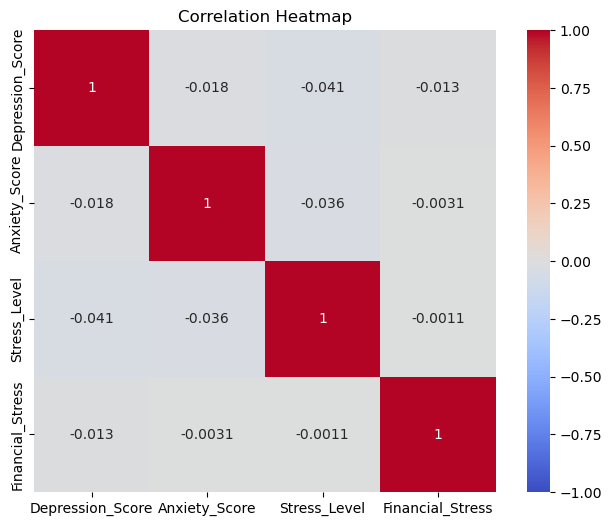

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the correlation matrix using Spearman's method
corr_matrix = df[['Depression_Score', 'Anxiety_Score', 'Stress_Level', 'Financial_Stress']].corr(method='spearman')

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, square=True)
plt.title("Correlation Heatmap")
plt.show()

#### Distribution of my target variables

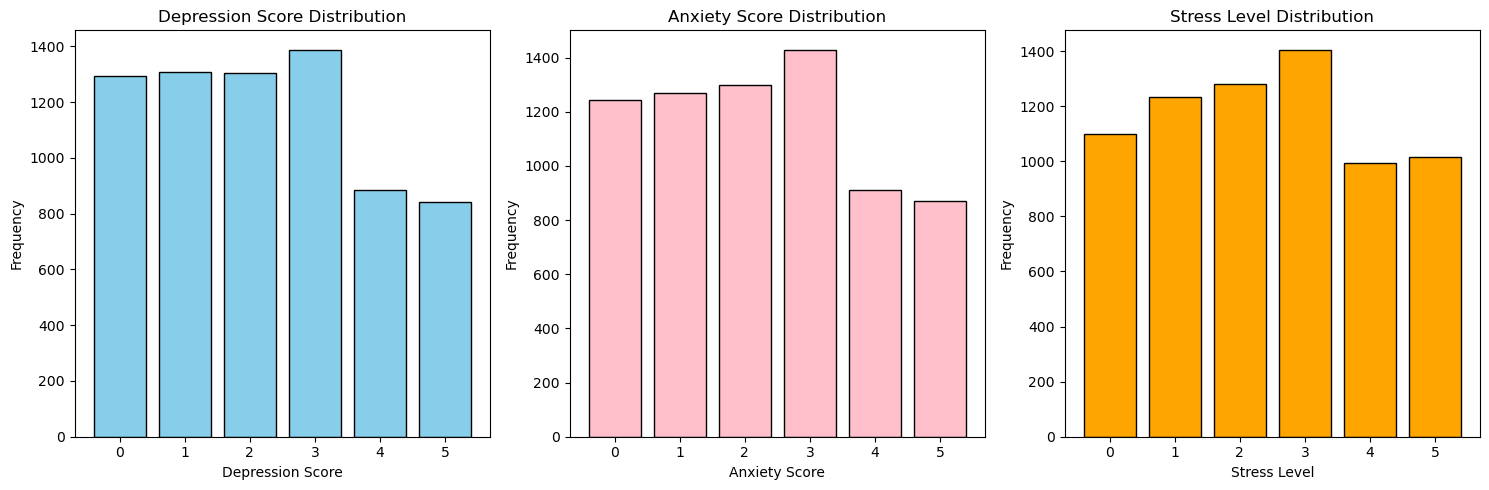

In [12]:
categories = [0,1,2,3,4,5]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
axes[0].bar(categories, df['Depression_Score'].value_counts().sort_index(), color='skyblue', edgecolor='black')
axes[0].set_title('Depression Score Distribution')
axes[0].set_xlabel('Depression Score')
axes[0].set_ylabel('Frequency')

axes[1].bar(categories, df['Anxiety_Score'].value_counts().sort_index(), color='pink', edgecolor='black')
axes[1].set_title('Anxiety Score Distribution')
axes[1].set_xlabel('Anxiety Score')
axes[1].set_ylabel('Frequency')

axes[2].bar(categories, df['Stress_Level'].value_counts().sort_index(), color='orange', edgecolor='black')
axes[2].set_title('Stress Level Distribution')
axes[2].set_xlabel('Stress Level')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#### Heatmap for course and my target variables

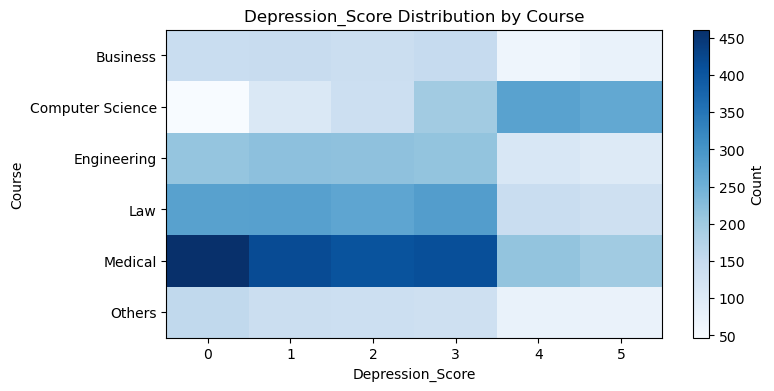

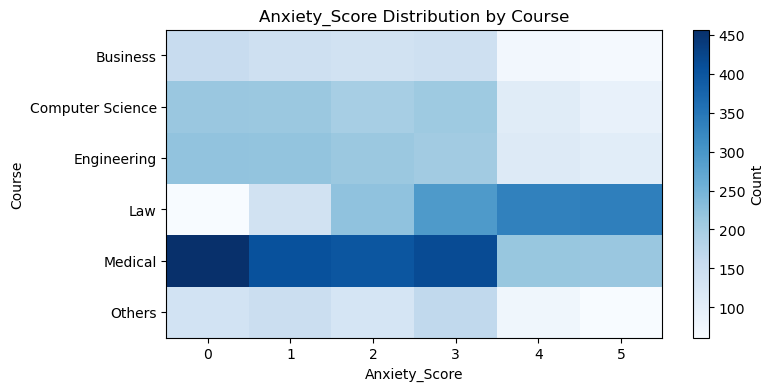

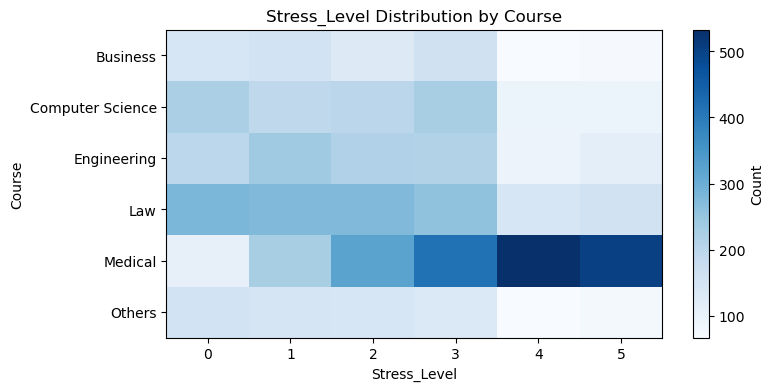

In [13]:
for i in ['Depression_Score', 'Anxiety_Score', 'Stress_Level']:
    heatmap = pd.crosstab(df['Course'], df[i])
    plt.figure(figsize=(8, 4))
    plt.imshow(heatmap, cmap='Blues', aspect='auto')
    plt.colorbar(label='Count')
    plt.xticks(range(len(heatmap.columns)), heatmap.columns)
    plt.yticks(range(len(heatmap.index)), heatmap.index)
    plt.title(f'{i} Distribution by Course')
    plt.xlabel(f'{i}')
    plt.ylabel('Course')
    plt.show()


#### Boxplot for CGPA and target variables

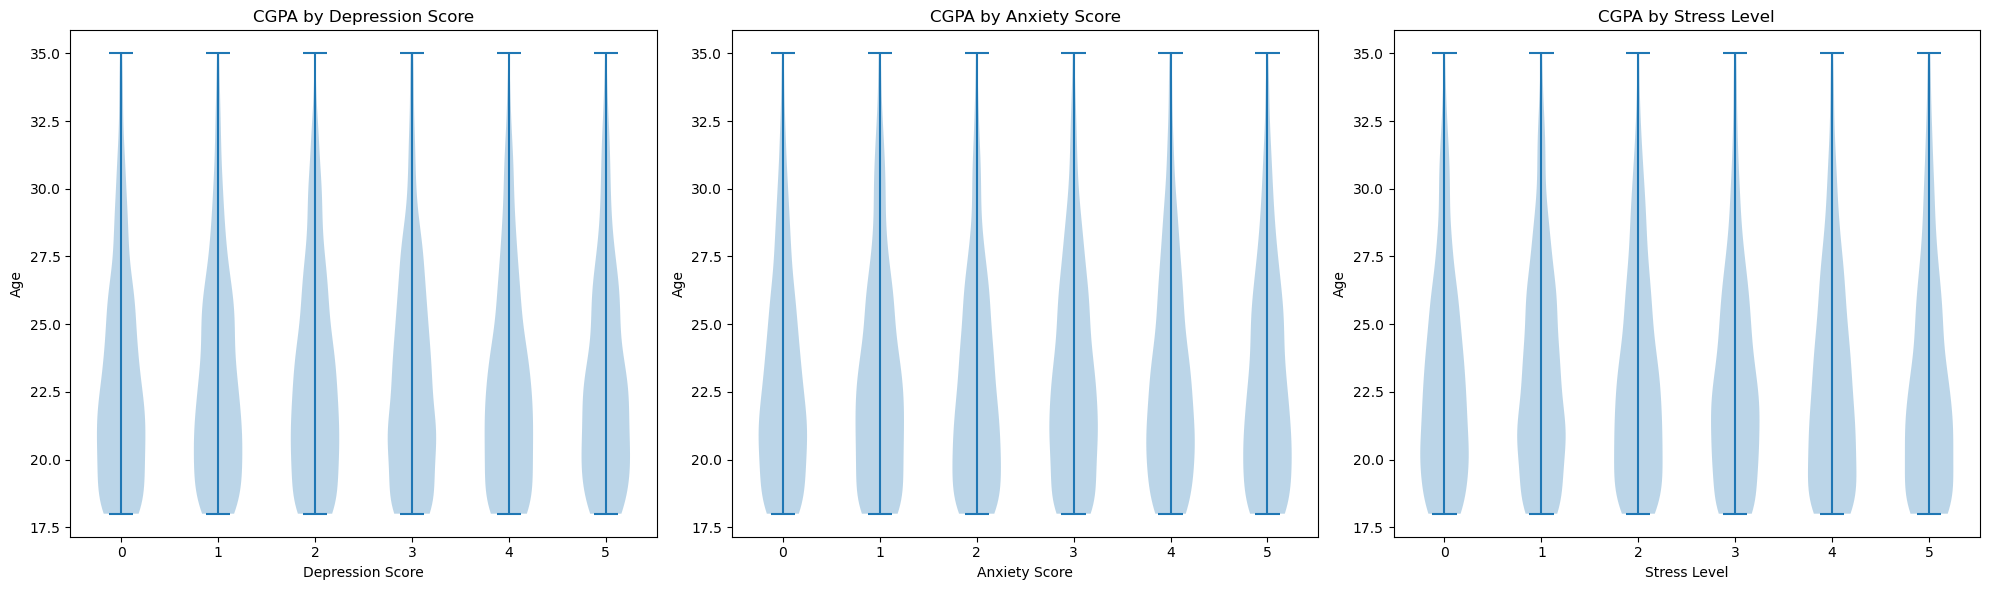

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
depression_unique = sorted(df['Depression_Score'].unique())
axes[0].violinplot([df['Age'][df['Depression_Score'] == score] for score in depression_unique])
axes[0].set_title('CGPA by Depression Score')
axes[0].set_xlabel('Depression Score')
axes[0].set_ylabel('Age')
axes[0].set_xticks(range(1, len(depression_unique) + 1))
axes[0].set_xticklabels(depression_unique)

anxiety_unique = sorted(df['Anxiety_Score'].unique())
axes[1].violinplot([df['Age'][df['Anxiety_Score'] == score] for score in anxiety_unique])
axes[1].set_title('CGPA by Anxiety Score')
axes[1].set_xlabel('Anxiety Score')
axes[1].set_ylabel('Age')
axes[1].set_xticks(range(1, len(anxiety_unique) + 1))
axes[1].set_xticklabels(anxiety_unique)

stress_unique = sorted(df['Stress_Level'].unique())
axes[2].violinplot([df['Age'][df['Stress_Level'] == score] for score in stress_unique])
axes[2].set_title('CGPA by Stress Level')
axes[2].set_xlabel('Stress Level')
axes[2].set_ylabel('Age')
axes[2].set_xticks(range(1, len(stress_unique) + 1))
axes[2].set_xticklabels(stress_unique)

plt.tight_layout()
plt.show()

In [ ]:
onehot_ftrs = ['Gender', 'Relationship_Status', 'Family_History', 'Chronic_Illness', 'Residence_Type'] 
minmax_ftrs = ['Age','CGPA', 'Semester_Credit_Load']
ordinal_ftrs = ['Stress_Level', 'Anxiety_Score', 'Financial_Stress', 'Sleep_Quality', 'Physical_Activity',
                 'Diet_Quality', 'Social_Support', 'Substance_Use', 'Counseling_Service_Use', 'Extracurricular_Involvement']

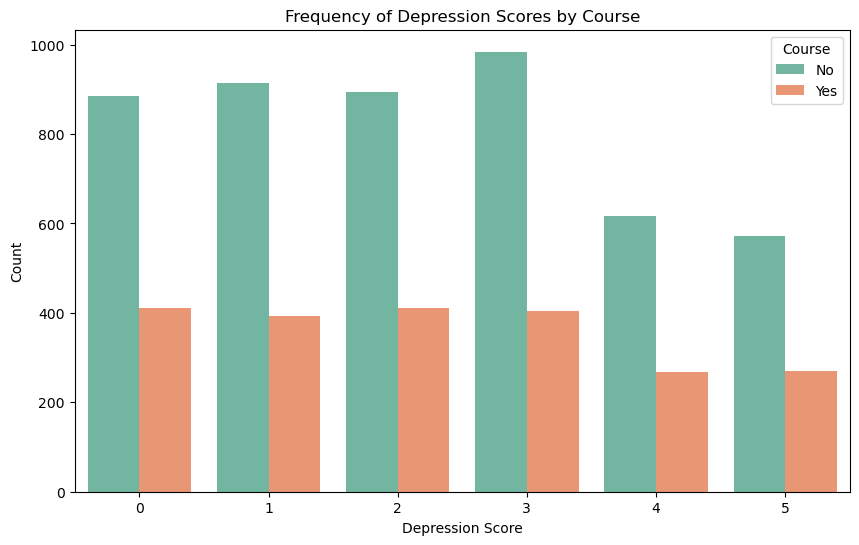

In [52]:
plt.figure(figsize=(10, 6))

# Plot the count of Depression Scores for each Gender
sns.countplot(data=df, x='Depression_Score', hue='Family_History', palette='Set2')

# Add labels and title
plt.title('Frequency of Depression Scores by Course')
plt.xlabel('Depression Score')
plt.ylabel('Count')

# Display the legend and the plot
plt.legend(title='Course')
plt.show()

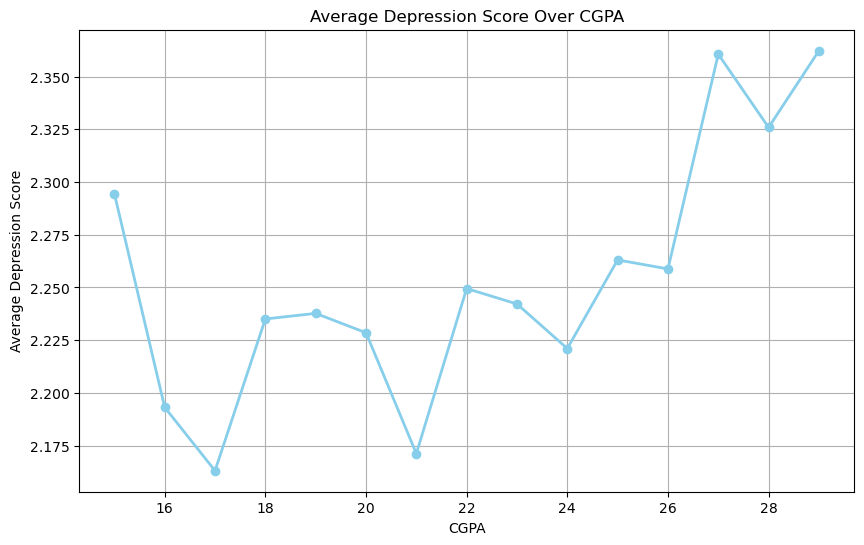

In [63]:
age_depression_mean = df.groupby('Semester_Credit_Load')['Depression_Score'].mean()

# Now, we can create the line plot.
plt.figure(figsize=(10, 6))
plt.plot(age_depression_mean.index, age_depression_mean.values, marker='o', color='skyblue', lw=2)
plt.title('Average Depression Score Over CGPA')
plt.xlabel('CGPA')
plt.ylabel('Average Depression Score')
plt.grid(True)
plt.show()

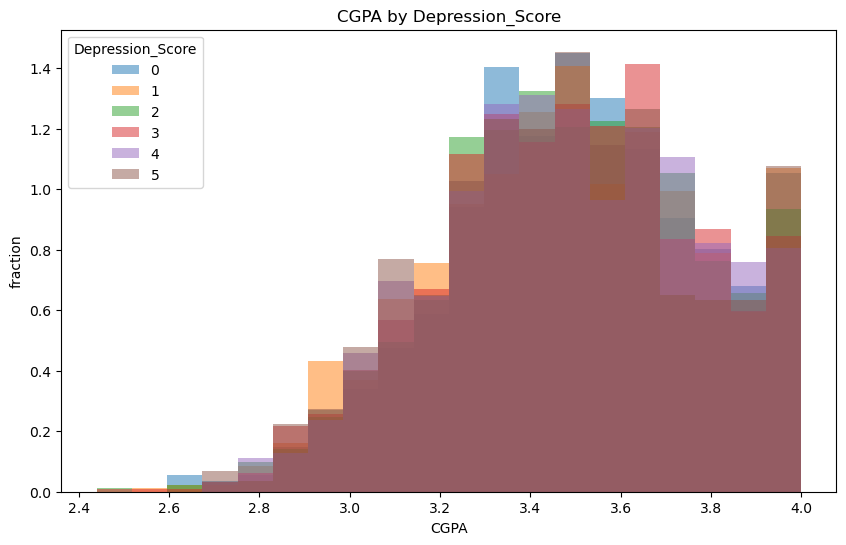

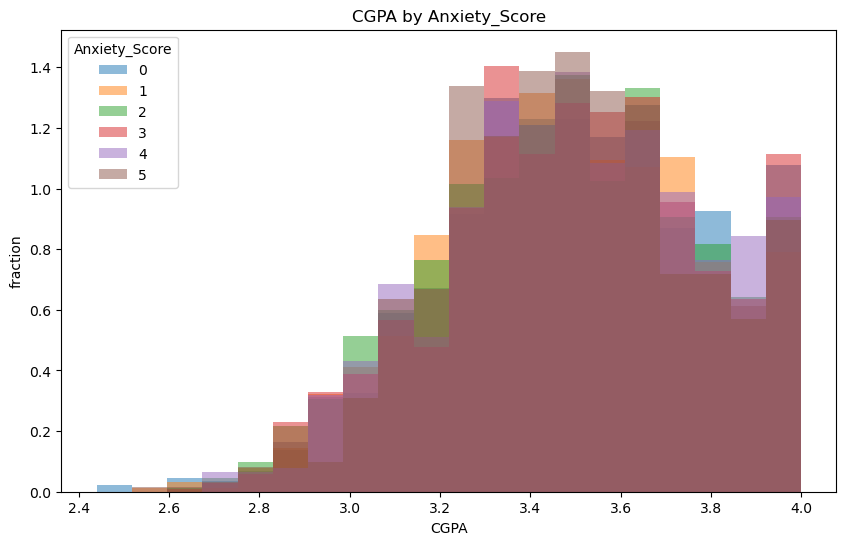

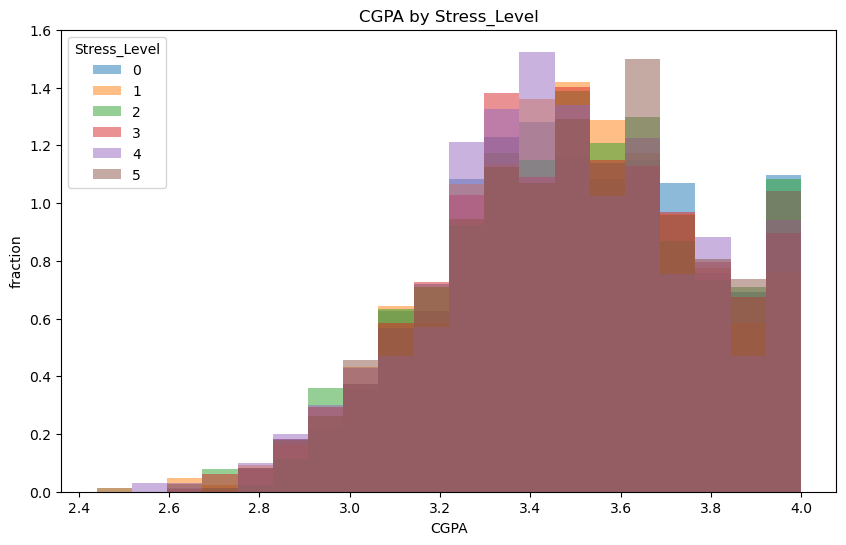

In [15]:
for i in ['Depression_Score', 'Anxiety_Score', 'Stress_Level']:
    categories = sorted(df[i].unique())
    bin_range = (df['CGPA'].min(),df['CGPA'].max())

    plt.figure(figsize=(10,6))

    for c in categories:
        plt.hist(df[df[i]==c]['CGPA'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
    plt.legend(title = i)
    plt.title('CGPA by ' + i)
    plt.ylabel('fraction')
    plt.xlabel('CGPA')
    plt.show()






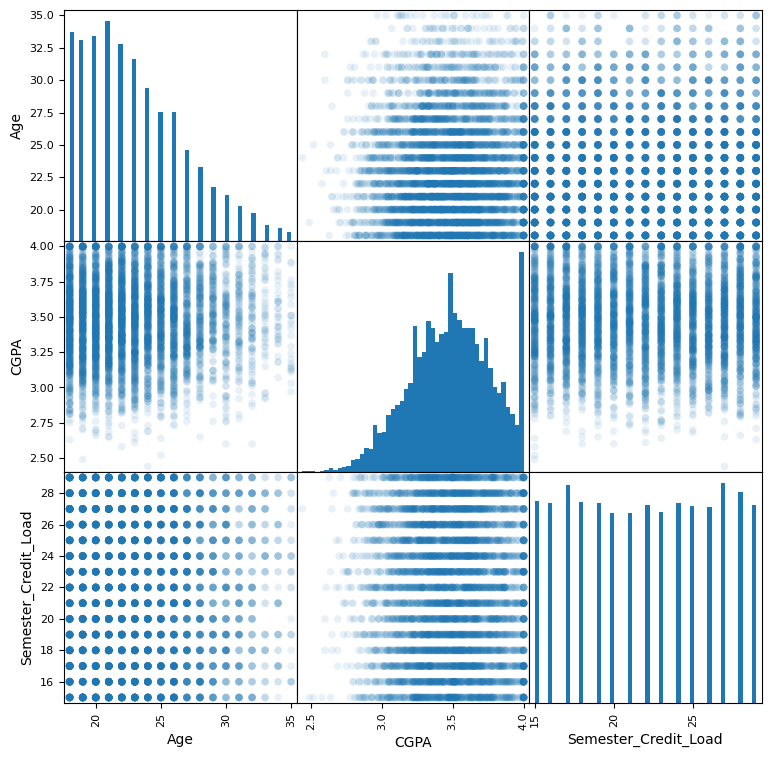

In [16]:
pd.plotting.scatter_matrix(df[['Age', 'CGPA', 'Semester_Credit_Load']], figsize=(9, 9), 
                           marker='o',hist_kwds={'bins': 50}, s=30, alpha=.1)
plt.show()

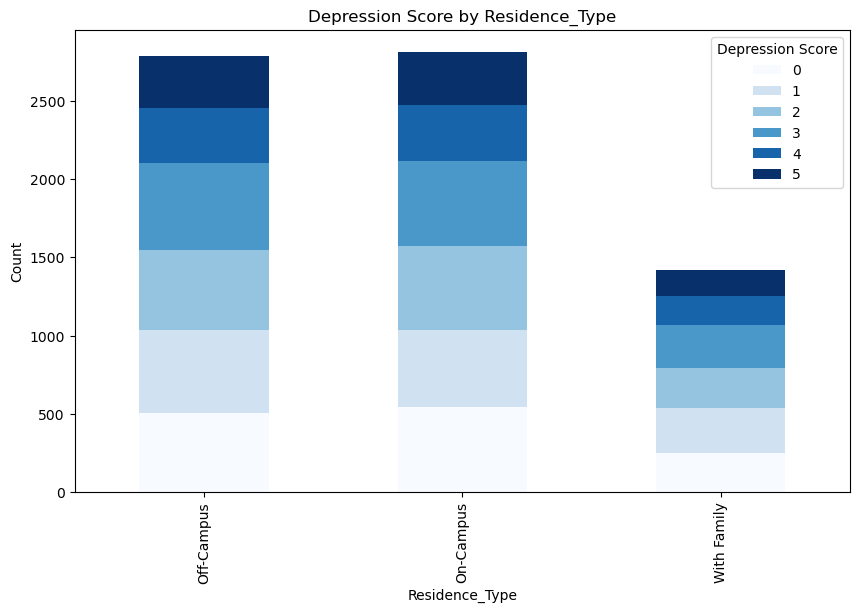

In [24]:
sleep_quality_counts = pd.crosstab(df['Residence_Type'], df['Depression_Score'])

# Plot stacked bar plot
sleep_quality_counts.plot(kind='bar', stacked=True, figsize=(10, 6), cmap='Blues')
plt.title('Depression Score by Residence_Type')
plt.xlabel('Residence_Type')
plt.ylabel('Count')
plt.legend(title='Depression Score')
plt.show()

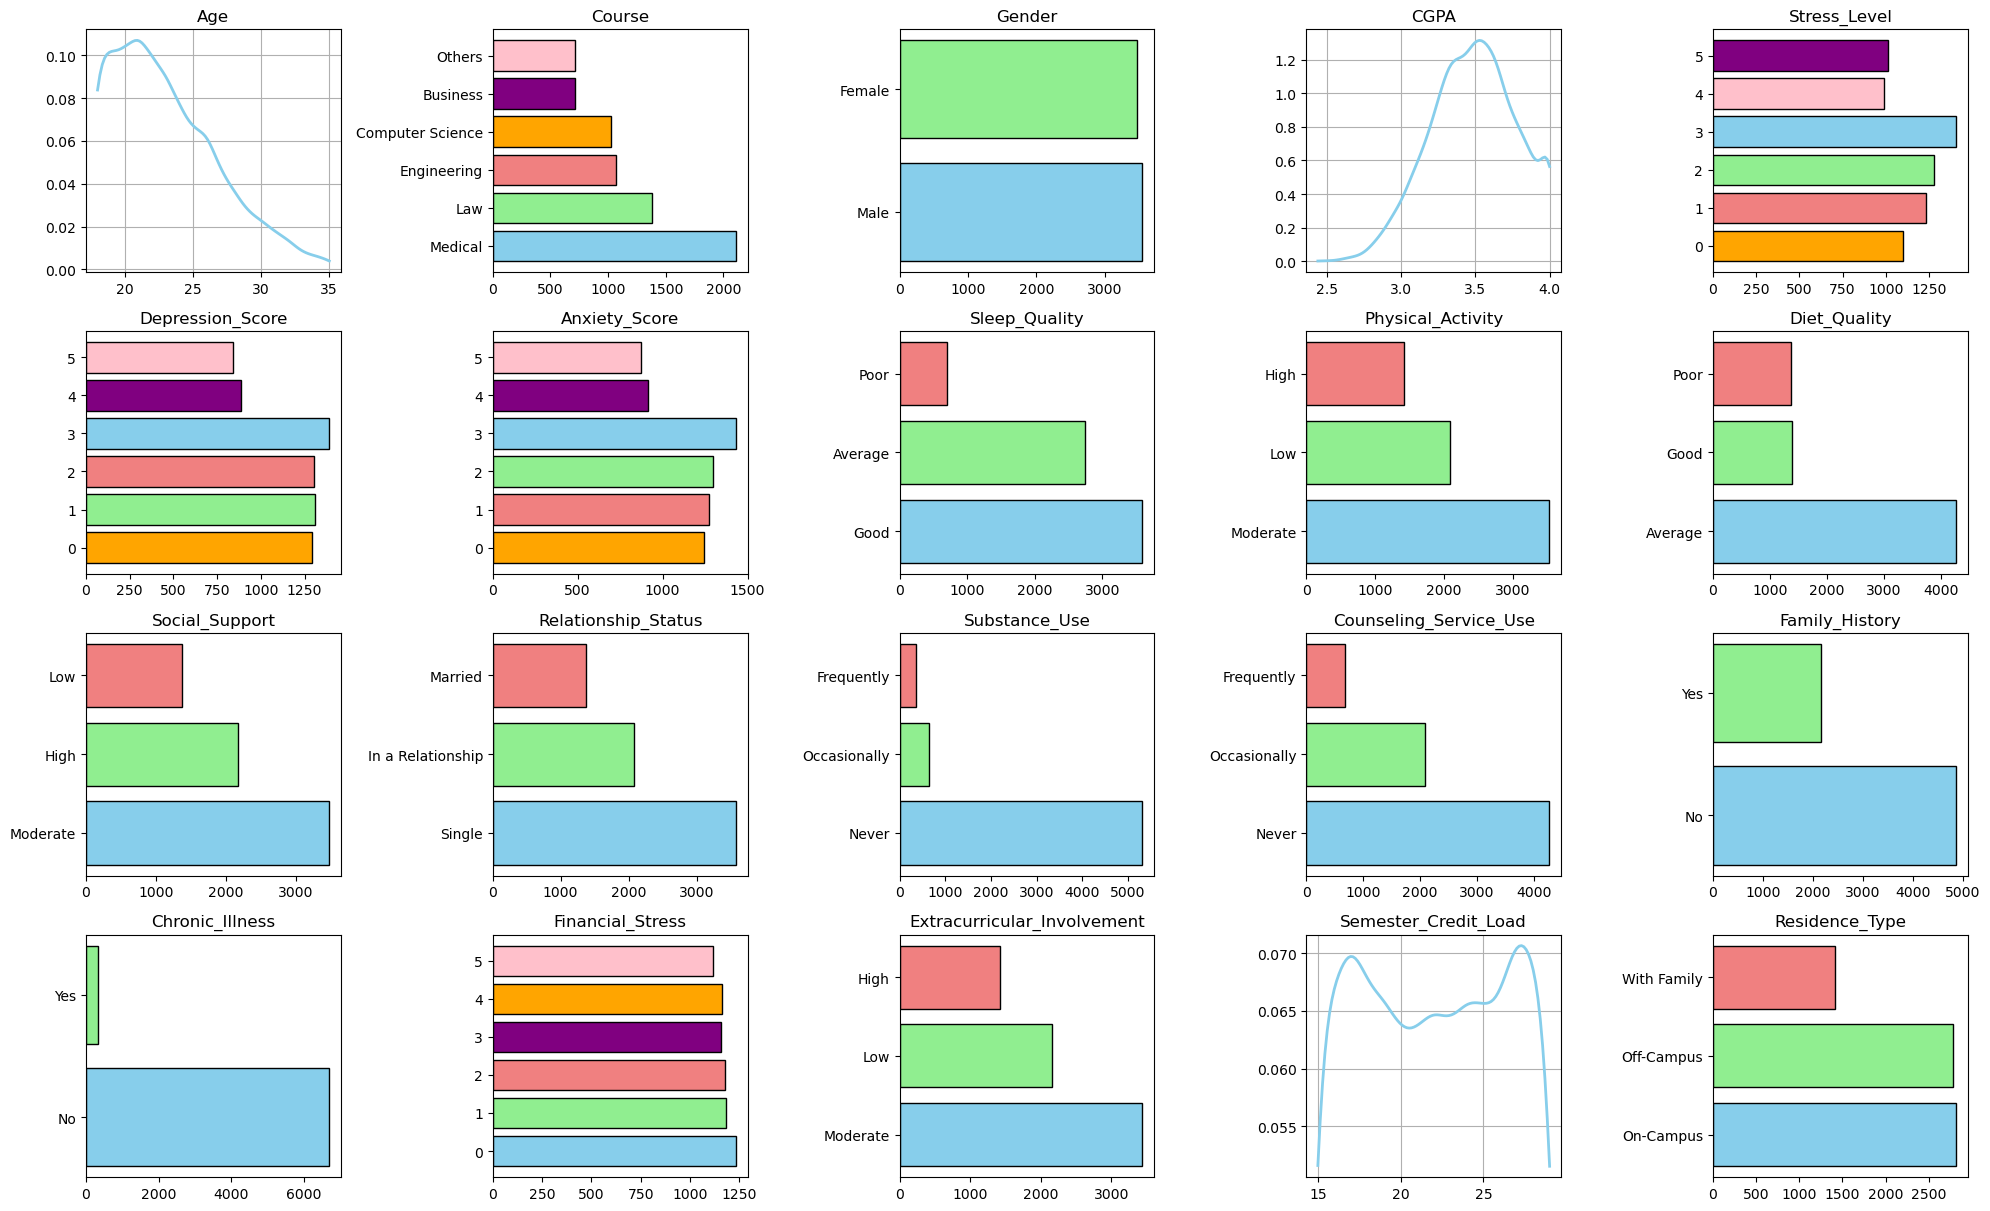

In [18]:
from scipy.stats import gaussian_kde

r = 5
c = 5
it = 1
plt.figure(figsize=(20, 15))

for i, j in enumerate(df.columns):
    plt.subplot(r, c, it)   
    if (df[j].dtype == 'object') or (j in ['Depression_Score', 'Anxiety_Score', 'Stress_Level', 'Financial_Stress']):
        value_counts = df[j].value_counts()
        colors = ['skyblue', 'lightgreen', 'lightcoral', 'orange', 'purple', 'pink']
        plt.barh(value_counts.index, value_counts.values, color=colors[:len(value_counts)], edgecolor='black')
        plt.title(j)
    
    else:
        col_clean = df[j].dropna()
        kde = gaussian_kde(col_clean)
        x_values = np.linspace(col_clean.min(), col_clean.max(), 100)
        plt.plot(x_values, kde(x_values), color='skyblue', lw=2)
        plt.title(j)
        plt.grid(True)    
    it += 1
    if it > r * c:
        break

plt.tight_layout()
plt.show()

## Splitting data

In [19]:
X = df.drop(columns = ['Depression_Score'])
X

,Age,Course,Gender,CGPA,Stress_Level,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
0,25,Others,Male,3.56,3,2,Good,Moderate,Good,Moderate,Married,Never,Never,No,No,2,Moderate,17,On-Campus
1,24,Engineering,Female,2.44,0,0,Average,Low,Average,Low,Single,Occasionally,Occasionally,No,No,3,Low,27,On-Campus
2,19,Business,Female,3.74,4,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
3,19,Computer Science,Male,3.65,2,0,Average,Low,Average,Moderate,Single,NaN,Never,No,No,4,Moderate,20,Off-Campus
4,18,Business,Male,3.40,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7017,20,Law,Female,3.69,3,5,Good,Low,Poor,High,Single,Never,Frequently,Yes,No,1,High,26,Off-Campus
7018,24,Medical,Female,3.73,3,1,Good,Moderate,Average,High,Single,Never,Occasionally,No,No,3,Low,15,Off-Campus
7019,26,Others,Male,3.65,4,1,Good,High,Poor,Moderate,Married,Never,Occasionally,No,Yes,4,Moderate,17,Off-Campus
7020,24,Medical,Male,NaN,4,4,Average,High,Poor,Moderate,Single,NaN,Never,No,Yes,4,Moderate,18,Off-Campus


In [20]:
y = df[['Depression_Score']]
y

,Depression_Score
0,3
1,3
2,0
3,1
4,3
...,...
7017,1
7018,4
7019,5
7020,3


In [21]:
#Splitting the test dataset
X_temp, X_test, y_temp, y_test = train_test_split(X,y, train_size = 0.8,random_state = 42)

In [22]:
X_test.head()

,Age,Course,Gender,CGPA,Stress_Level,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
3909,19,Medical,Female,3.85,5,4,Good,Moderate,Average,High,Married,Occasionally,Occasionally,Yes,No,1,Low,29,On-Campus
2462,26,Others,Male,NaN,1,0,Average,Low,Good,Moderate,Single,NaN,Frequently,Yes,No,4,High,26,Off-Campus
2879,28,Medical,Male,3.33,5,3,Poor,Low,Average,High,Single,Never,Never,No,No,0,Moderate,16,Off-Campus
3761,19,Medical,Female,4.00,5,1,Poor,High,Poor,Moderate,Single,Never,Never,No,No,1,Moderate,28,With Family
3745,20,Computer Science,Female,3.42,3,1,Average,Moderate,Good,High,Single,Occasionally,Occasionally,No,No,3,Moderate,17,Off-Campus


In [57]:
y_test.head()

,Depression_Score
3909,0
2462,0
2879,0
3761,2
3745,5


In [78]:
def Group_split_data(X,y,groups, test_size, random_state,n_folds):
    splitter = GroupShuffleSplit(n_splits=1,test_size=test_size,random_state=random_state)
    for i_other,i_test in splitter.split(X, y, groups):
        X_other, y_other, groups_other = X.iloc[i_other], y.iloc[i_other], groups.iloc[i_other]
        X_test, y_test, groups_test = X.iloc[i_test], y.iloc[i_test], groups.iloc[i_test]
    kf = GroupKFold(n_splits=n_folds)
    folds = []
    for train_idx, val_idx in kf.split(X_other, y_other, groups_other):
        X_train, X_val = X_other.iloc[train_idx], X_other.iloc[val_idx]
        y_train, y_val = y_other.iloc[train_idx], y_other.iloc[val_idx]
        folds.append((X_train, X_val, y_train, y_val))
    return folds, X_test, y_test

In [79]:
X = df.drop(columns = ['Depression_Score'])
y = df[['Depression_Score']]
groups = df['Course']
random_state = 34
n_folds = 3
test_size = 0.2
folds, X_test, y_test = Group_split_data(X,y,groups, test_size, random_state,n_folds)

In [80]:
X_test.head()

,Age,Course,Gender,CGPA,Stress_Level,Anxiety_Score,Sleep_Quality,Physical_Activity,Diet_Quality,Social_Support,Relationship_Status,Substance_Use,Counseling_Service_Use,Family_History,Chronic_Illness,Financial_Stress,Extracurricular_Involvement,Semester_Credit_Load,Residence_Type
2,19,Business,Female,3.74,4,3,Good,Low,Average,Moderate,In a Relationship,Never,Occasionally,No,No,4,High,15,On-Campus
4,18,Business,Male,3.40,3,4,Good,Low,Average,High,Married,Never,Never,No,Yes,0,High,23,On-Campus
6,18,Law,Male,3.65,2,5,Good,Moderate,Average,Moderate,Single,Never,Never,No,No,4,Moderate,20,Off-Campus
7,21,Business,Female,3.40,0,3,Average,Low,Average,Low,Married,Never,Never,Yes,No,3,Moderate,23,On-Campus
10,23,Law,Female,3.74,3,4,Average,Low,Good,Moderate,In a Relationship,NaN,Occasionally,No,No,3,Moderate,22,Off-Campus


In [81]:
y_test.head()

,Depression_Score
2,0
4,3
6,2
7,3
10,2


# Preprocessing

Don't need to apply ordinal encoding on Stress_Level, Anxiety_Score, and Financial_Stress since they are already scaled in 0 to 5.

In [82]:
onehot_ftrs = ['Gender', 'Relationship_Status', 'Family_History', 'Chronic_Illness', 'Residence_Type'] 
minmax_ftrs = ['Age','CGPA', 'Semester_Credit_Load']
ordinal_ftrs = ['Stress_Level', 'Anxiety_Score', 'Financial_Stress', 'Sleep_Quality', 'Physical_Activity',
                 'Diet_Quality', 'Social_Support', 'Substance_Use', 'Counseling_Service_Use', 'Extracurricular_Involvement']
ordinal_cats = [
    [0, 1, 2, 3, 4, 5],  # Stress_Level
    [0, 1, 2, 3, 4, 5],  # Anxiety_Score
    [0, 1, 2, 3, 4, 5],  # Financial_Stress
    ['Poor', 'Average', 'Good'],  # Sleep_Quality
    ['Low', 'Moderate', 'High'],  # Physical_Activity
    ['Poor', 'Average', 'Good'],  # Diet_Quality
    ['Low', 'Moderate', 'High'],  # Social_Support
    ['Never', 'Occasionally', 'Frequently'],  # Substance_Use
    ['Never', 'Occasionally', 'Frequently'],  # Counseling_Service_Use
    ['Low', 'Moderate', 'High']  # Extracurricular_Involvement
]
preprocessor = ColumnTransformer(
    transformers=[
        ('minmax', MinMaxScaler(), minmax_ftrs),
        ('ord', OrdinalEncoder(categories = ordinal_cats, handle_unknown='use_encoded_value', unknown_value=-1), ordinal_ftrs),
        ('onehot', OneHotEncoder(sparse_output=False,handle_unknown='ignore'), onehot_ftrs)])
clf = Pipeline(steps=[('preprocessor', preprocessor)])

for i in range(len(folds)):
    globals()[f"X_train_prep_{i+1}"] = clf.fit_transform(folds[i][0])
    globals()[f"X_val_prep_{i+1}"] = clf.transform(folds[i][1])
    globals()[f"X_test_prep_{i+1}"] = clf.transform(X_test)


In [83]:
for i in range(1,4):
    print(f'My X_train_prep_{i} is ', globals()[f"X_train_prep_{i}"])
    print('And the corresponding validation is ', globals()[f"X_val_prep_{i}"])
    print('And the corresponding test is ', globals()[f"X_test_prep_{i}"])

My X_train_prep_1 is  [[0.41176471 0.71794872 0.14285714 ... 0.         1.         0.        ]
 [0.35294118 0.         0.85714286 ... 0.         1.         0.        ]
 [0.05882353 0.77564103 0.35714286 ... 1.         0.         0.        ]
 ...
 [0.23529412        nan 1.         ... 0.         1.         0.        ]
 [0.                nan 0.35714286 ... 0.         1.         0.        ]
 [0.47058824 0.77564103 0.14285714 ... 1.         0.         0.        ]]
And the corresponding validation is  [[0.17647059 0.58333333 0.28571429 ... 1.         0.         0.        ]
 [0.35294118 0.87179487 0.92857143 ... 0.         1.         0.        ]
 [0.52941176 0.52564103 0.14285714 ... 0.         0.         1.        ]
 ...
 [0.35294118 0.82692308 0.         ... 1.         0.         0.        ]
 [0.35294118        nan 0.21428571 ... 1.         0.         0.        ]
 [0.23529412        nan 0.14285714 ... 0.         0.         1.        ]]
And the corresponding test is  [[0.05882353 0.8333333

In [84]:
for i in range(len(folds)):

    feature_names = preprocessor.get_feature_names_out()
    globals()[f"df_train_{i+1}"] = pd.DataFrame(data=globals()[f"X_train_prep_{i+1}"],columns=feature_names)


    globals()[f"df_CV_{i+1}"] = pd.DataFrame(data=globals()[f"X_val_prep_{i+1}"],columns = feature_names)


    globals()[f"df_test_{i+1}"] = pd.DataFrame(data=globals()[f"X_test_prep_{i+1}"],columns = feature_names)

    print('data dimensions:',globals()[f"df_train_{i+1}"].shape)
    perc_missing_per_ftr = globals()[f"df_train_{i+1}"].isnull().sum(axis=0)/globals()[f"df_train_{i+1}"].shape[0]
    print('fraction of missing values in features:')
    print(perc_missing_per_ftr[perc_missing_per_ftr > 0])
    print('data types of the features with missing values:')
    print(globals()[f"df_train_{i+1}"][perc_missing_per_ftr[perc_missing_per_ftr > 0].index].dtypes)
    frac_missing = sum(globals()[f"df_train_{i+1}"].isnull().sum(axis=1)!=0)/globals()[f"df_train_{i+1}"].shape[0]
    print('fraction of points with missing values:',frac_missing)

data dimensions: (2815, 22)
fraction of missing values in features:
minmax__CGPA    0.100178
dtype: float64
data types of the features with missing values:
minmax__CGPA    float64
dtype: object
fraction of points with missing values: 0.10017761989342806
data dimensions: (3848, 22)
fraction of missing values in features:
minmax__CGPA    0.101871
dtype: float64
data types of the features with missing values:
minmax__CGPA    float64
dtype: object
fraction of points with missing values: 0.10187110187110188
data dimensions: (3177, 22)
fraction of missing values in features:
minmax__CGPA    0.099465
dtype: float64
data types of the features with missing values:
minmax__CGPA    float64
dtype: object
fraction of points with missing values: 0.0994649039974819


In [85]:
df_train_1

,minmax__Age,minmax__CGPA,minmax__Semester_Credit_Load,ord__Sleep_Quality,ord__Physical_Activity,ord__Diet_Quality,ord__Social_Support,ord__Substance_Use,ord__Counseling_Service_Use,ord__Extracurricular_Involvement,...,onehot__Relationship_Status_In a Relationship,onehot__Relationship_Status_Married,onehot__Relationship_Status_Single,onehot__Family_History_No,onehot__Family_History_Yes,onehot__Chronic_Illness_No,onehot__Chronic_Illness_Yes,onehot__Residence_Type_Off-Campus,onehot__Residence_Type_On-Campus,onehot__Residence_Type_With Family
0,0.411765,0.717949,0.142857,2.0,1.0,2.0,1.0,0.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,0.352941,0.000000,0.857143,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.058824,0.775641,0.357143,1.0,0.0,1.0,1.0,-1.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,0.058824,0.391026,0.857143,1.0,1.0,2.0,0.0,-1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
4,0.588235,NaN,0.357143,1.0,1.0,1.0,1.0,0.0,1.0,1.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2810,0.000000,0.788462,0.142857,2.0,2.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2811,0.294118,0.698718,0.714286,2.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
2812,0.235294,NaN,1.000000,1.0,2.0,0.0,2.0,0.0,1.0,2.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2813,0.000000,NaN,0.357143,1.0,2.0,1.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [86]:
df_train_1.columns

Index(['minmax__Age', 'minmax__CGPA', 'minmax__Semester_Credit_Load',
       'ord__Sleep_Quality', 'ord__Physical_Activity', 'ord__Diet_Quality',
       'ord__Social_Support', 'ord__Substance_Use',
       'ord__Counseling_Service_Use', 'ord__Extracurricular_Involvement',
       'onehot__Gender_Female', 'onehot__Gender_Male',
       'onehot__Relationship_Status_In a Relationship',
       'onehot__Relationship_Status_Married',
       'onehot__Relationship_Status_Single', 'onehot__Family_History_No',
       'onehot__Family_History_Yes', 'onehot__Chronic_Illness_No',
       'onehot__Chronic_Illness_Yes', 'onehot__Residence_Type_Off-Campus',
       'onehot__Residence_Type_On-Campus',
       'onehot__Residence_Type_With Family'],
      dtype='object')